In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-Means


In [2]:
from sklearn.cluster import KMeans

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

In [4]:
url = 'https://raw.githubusercontent.com/kvinlazy/Dataset/master/cars_clus.csv'
cars = pd.read_csv(url)
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [5]:
print ("Shape of dataset before cleaning: ", cars.shape)
cars[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = cars[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
cars = cars.dropna()
cars = cars.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", cars.shape)
cars.head(5)

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [66]:
print(cars.var())

sales        5633.843458
resale        134.690698
type            0.188034
price         200.213992
engine_s        1.113382
horsepow     3432.997347
wheelbas       64.811964
width          12.461963
length        191.820451
curb_wgt        0.356620
fuel_cap       14.399058
mpg            19.396658
lnsales         1.789876
partition       0.000000
dtype: float64


In [121]:
corrc = cars.drop(labels=['partition', 'type', 'manufact', 'model', ], axis=1)

In [123]:
corrc.corr()

,sales,resale,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales
sales,1.000000,-0.275426,-0.251705,0.038111,-0.152538,0.406839,0.177802,0.272336,0.067184,0.138045,-0.066715,0.731023
resale,-0.275426,1.000000,0.954757,0.527187,0.773110,-0.053685,0.178128,0.025390,0.363274,0.324796,-0.399097,-0.524061
price,-0.251705,0.954757,1.000000,0.649170,0.853455,0.067042,0.301292,0.182592,0.511400,0.406496,-0.479930,-0.490187
engine_s,0.038111,0.527187,0.649170,1.000000,0.861618,0.410020,0.671756,0.537343,0.742831,0.616862,-0.724829,-0.156119
horsepow,-0.152538,0.773110,0.853455,0.861618,1.000000,0.225905,0.507275,0.400968,0.598603,0.479790,-0.595963,-0.358880
wheelbas,0.406839,-0.053685,0.067042,0.410020,0.225905,1.000000,0.675559,0.853669,0.675609,0.658654,-0.470685,0.334756
width,0.177802,0.178128,0.301292,0.671756,0.507275,0.675559,1.000000,0.743226,0.735957,0.672191,-0.599613,0.063028
length,0.272336,0.025390,0.182592,0.537343,0.400968,0.853669,0.743226,1.000000,0.684305,0.562504,-0.465722,0.196385
curb_wgt,0.067184,0.363274,0.511400,0.742831,0.598603,0.675609,0.735957,0.684305,1.000000,0.847994,-0.818973,-0.018407
fuel_cap,0.138045,0.324796,0.406496,0.616862,0.479790,0.658654,0.672191,0.562504,0.847994,1.000000,-0.808633,-0.015391


In [99]:
cars_sales = cars[["price","sales","length"]]
cars_sales.head()

,price,sales,length
0,21.50,16.919,172.4
1,28.40,39.384,192.9
2,42.00,8.588,196.6
3,23.99,20.397,178.0
4,33.95,18.780,192.0


In [100]:
X = np.array(cars_sales)
Y = np.array(cars['manufact'].astype(str) + " " + cars["model"])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()
cars_norm = pd.DataFrame(scaler.fit_transform(cars_sales), columns=cars_sales.columns)
cars_norm

,price,sales,length
0,0.167178,0.031102,0.306258
1,0.261228,0.072669,0.579228
2,0.446603,0.015687,0.628495
3,0.201118,0.037537,0.380826
4,0.336877,0.034545,0.567244
...,...,...,...
112,0.077217,0.017857,0.185087
113,0.101752,0.154706,0.304927
114,0.163089,0.094351,0.462051
115,0.146596,0.017502,0.146471


In [102]:
X_norm = np.array(cars_norm)

In [103]:
maxPrice = max(X[:,0])
n_maxPrice = np.argmax(X[:,0])
maxSales = max(X[:,1])
n_maxSales = np.argmax(X[:,1])
maxLength = max(X[:,2])
n_maxLength = np.argmax(X[:,2])

print("Precio máximo: {} -> {} \nVentas máximas: {} -> {} \nLargo máximo: {} -> {}".format(maxPrice, Y[n_maxPrice], maxSales, Y[n_maxSales], maxLength, Y[n_maxLength]))

Precio máximo: 82.6 -> Mercedes-Benz SL-Class 
Ventas máximas: 540.561 -> Ford F-Series 
Largo máximo: 224.5 -> Ford F-Series


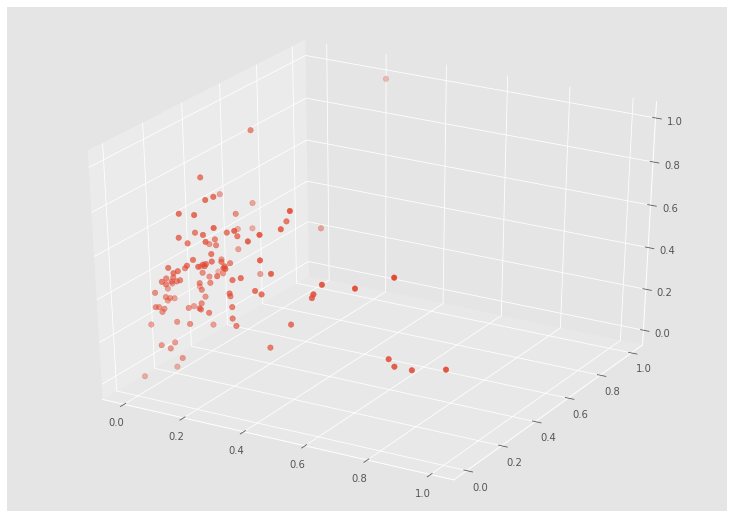

In [104]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_norm[:, 0], X_norm[:, 1], X_norm[:, 2], s=30)


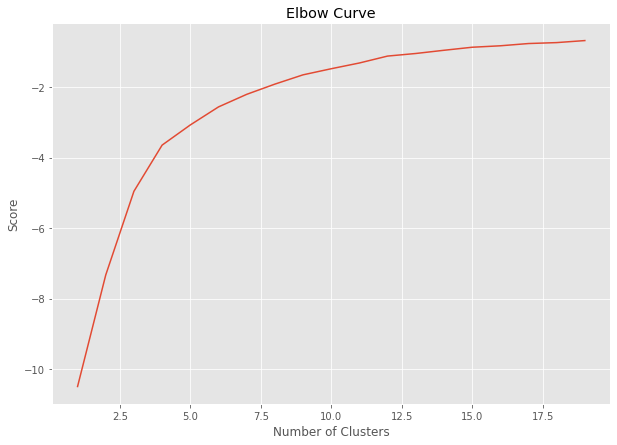

In [124]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.savefig('elbow.png')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=5).fit(X_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.25890752 0.08758179 0.72947182]
 [0.73468684 0.01594705 0.49054594]
 [0.14991708 0.47825818 0.67702323]
 [0.07497015 0.10450415 0.28909602]
 [0.20752112 0.07203826 0.49754937]]


In [107]:
labels = kmeans.predict(X_norm)
C = kmeans.cluster_centers_

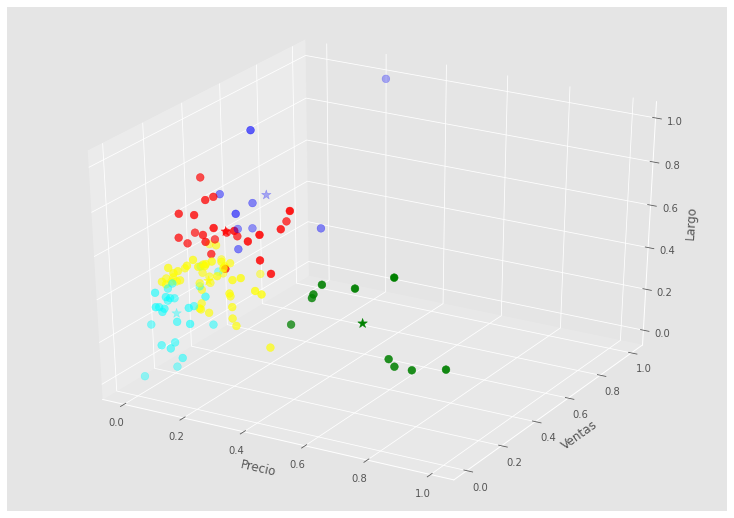

In [125]:
colores=['red','green','blue','cyan','yellow']#,'pink']#,'violet','orange'
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("Precio")
ax.set_ylabel("Ventas")
ax.set_zlabel("Largo")
ax.scatter(X_norm[:, 0], X_norm[:, 1], X_norm[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)
plt.savefig('Kmeans.png')

In [110]:
for i in range(len(X)):
  if kmeans.labels_[i] == 3:
    print(Y[i] , "Ventas:", X[i][0], "Precio:", X[i][1], "Largo:", X[i][2])

Acura Integra Ventas: 21.5 Precio: 16.919 Largo: 172.4
Chevrolet Cavalier Ventas: 13.26 Precio: 145.519 Largo: 180.9
Chevrolet Prizm Ventas: 13.96 Precio: 32.299 Largo: 174.3
Chevrolet Metro Ventas: 9.235 Precio: 21.855 Largo: 149.4
Dodge Neon Ventas: 12.64 Precio: 76.03399999999999 Largo: 174.4
Ford Escort Ventas: 12.07 Precio: 70.227 Largo: 174.7
Honda Civic Ventas: 12.885 Precio: 199.685 Largo: 175.1
Honda CR-V Ventas: 20.55 Precio: 73.203 Largo: 177.6
Hyundai Accent Ventas: 9.699 Precio: 41.184 Largo: 166.7
Hyundai Elantra Ventas: 11.799000000000001 Precio: 66.692 Largo: 174.0
Jeep Wrangler Ventas: 14.46 Precio: 55.556999999999995 Largo: 152.0
Jeep Cherokee Ventas: 21.62 Precio: 80.556 Largo: 167.5
Mitsubishi Mirage Ventas: 13.987 Precio: 26.232 Largo: 173.6
Mitsubishi Eclipse Ventas: 19.047 Precio: 42.541000000000004 Largo: 175.4
Nissan Sentra Ventas: 13.499 Precio: 42.643 Largo: 177.5
Plymouth Neon Ventas: 12.64 Precio: 32.734 Largo: 174.4
Saturn SL Ventas: 10.685 Precio: 80.62 L

# Hierarchical Clustering

In [111]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [112]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_norm)

In [113]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, labels = Y,orientation = 'right',leaf_font_size =12)

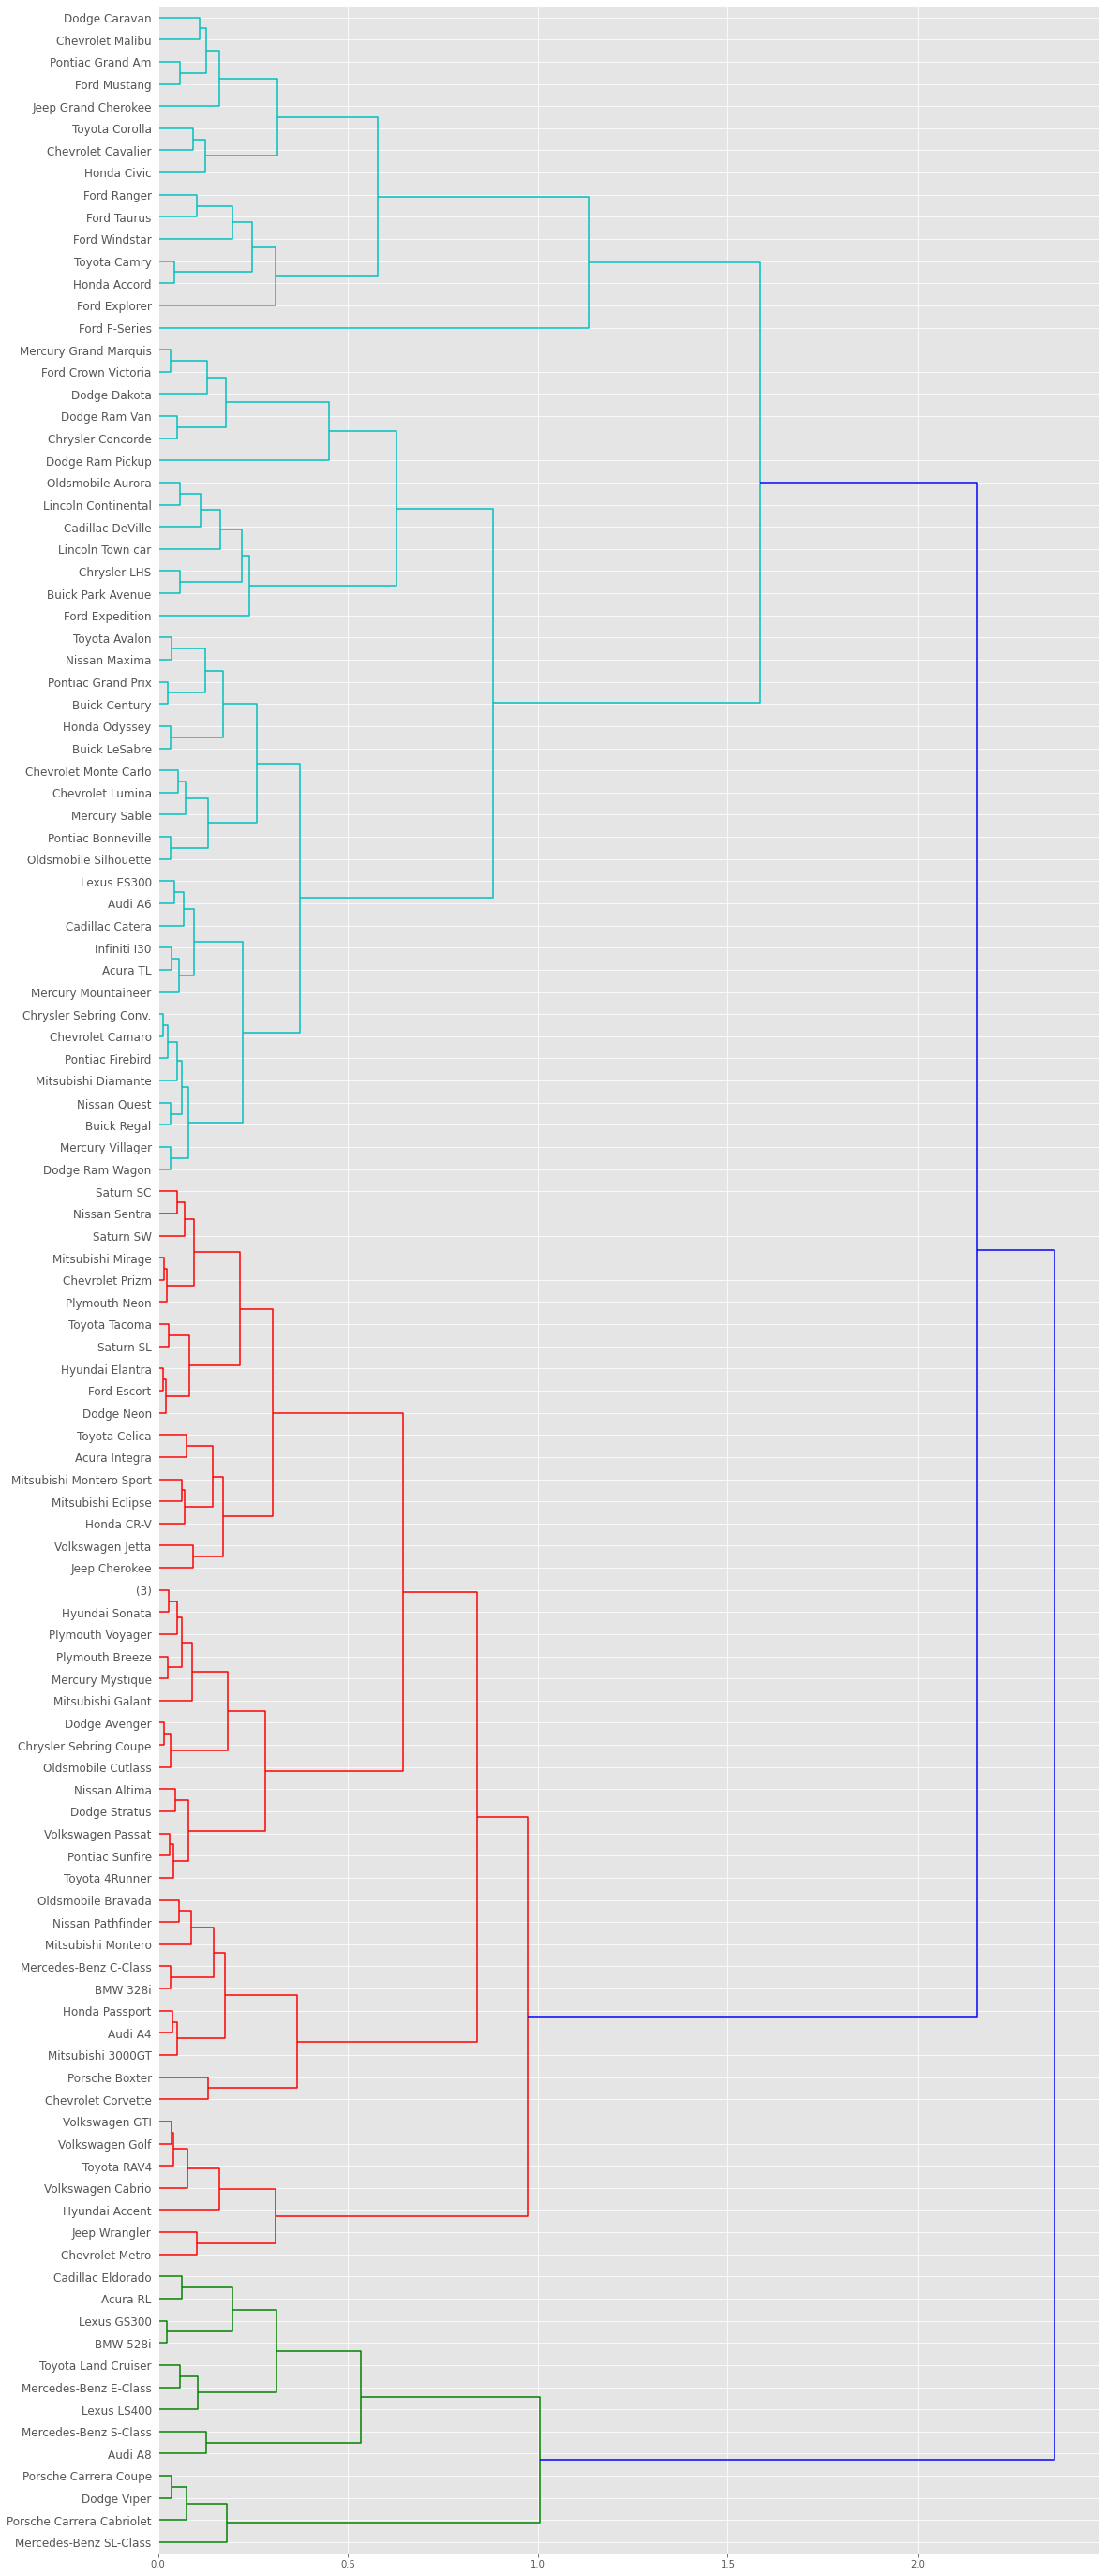

In [126]:
fig = plt.figure(figsize=(18,50))
plot_dendrogram(model, truncate_mode='level', p=10)
plt.savefig('Dendogram.png')